# 聚类方法实操

## 实验简介

### 实验介绍

聚类算法是最常见的无监督学习算法，应用在很多商业场景中，比如刻画用户画像、进行群体分析等等。其中最常见的算法是基于原型的Kmeans系列算法，本实验我们将使用sklearn算法包，在对应的任务中对该算法的调用、调优过程进行细致的分析和实现。



#### Kmeans数据集

在NBA的媒体报道，体育记者通常会集中在少数几个球员身边。为什么这个球员与其他球员不一样？使用数据挖掘可以探索这个问题。Kmeans算法使用的数据集是NBA控卫数据集，部分特征的描述如下：

- player – name of the player（球员姓名）
- pos – the position of the player（球员位置）
- g – number of games the player was in（参加次数）
- pts – total points the player scored（球员总得分）
- fg – field goal percentage（投篮命中率）
- ft – free throw percentage（罚球命中率）


### 实验目的

* 掌握kmeans聚类算法的原理和代码实现
* 掌握常见的数据预处理过程



## 任务一 Kmeans 实验步骤

K-Means算法是一种无监督学习算法，主要用于数据的聚类。其基本思想是通过迭代求解，将数据集划分为K个簇，并找出每个簇的中心点。在执行过程中，首先需要对数据进行预处理，包括标准化和异常点过滤等步骤。接着，从数据集中随机选取K个对象作为初始的聚类中心。

然后，计算每个对象与各个种子聚类中心之间的距离，根据距离的远近将每个对象分配给距离它最近的聚类中心。之后，重新计算每个簇的中心点（即该簇中所有对象的均值），并进行迭代，直到簇的中心点不再发生变化或达到预设的最大迭代次数为止。最后，K-Means算法会输出每个样本数据对应的簇标签以及每个簇的中心点坐标。

### 步骤1 导入包

导入需要使用到的工具包，包括了数据处理包、可视化包、机器学习包等。

<font color="blue">输入：</font>

In [134]:
# 导入包
## 数据处理包
import pandas as pd            
import numpy as np            
import math
import os

## 可视化包
import matplotlib.pyplot as plt

## 模型包
from sklearn import metrics
from sklearn import preprocessing
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans

### 步骤2 数据探查

数据探查过程帮助我们更加直观的感受数据集，包括数据集的大小、每列特征的数据类型、是否有缺失值等信息。

<font color="blue">输入：</font>

In [135]:
# 读入数据
nba=pd.read_csv('nba_2013.csv')

<font color="blue">输入：</font>

In [136]:
# 数据查看
nba.head(10) ## 查看数据的前面10行，当没有指定具体行数时默认前5行。

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [137]:
# 查看数据每一列详细特征
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

<font color="red">输出：</font>

In [138]:
# 查看数值型特征的统计指标
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0



### 步骤3 查看控卫特征分布

在该数据集中，我们的目的是对控卫这个角色进行聚类，因此需要筛选出控卫的数据。然后对该数据集进行简单的查看。


In [139]:
# 查看控卫数据整体描述
point_guards=nba[nba['pos']=="PG"]           # 选取pos=PG的数据
point_guards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 24 to 471
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        85 non-null     object 
 1   pos           85 non-null     object 
 2   age           85 non-null     int64  
 3   bref_team_id  85 non-null     object 
 4   g             85 non-null     int64  
 5   gs            85 non-null     int64  
 6   mp            85 non-null     int64  
 7   fg            85 non-null     int64  
 8   fga           85 non-null     int64  
 9   fg.           84 non-null     float64
 10  x3p           85 non-null     int64  
 11  x3pa          85 non-null     int64  
 12  x3p.          83 non-null     float64
 13  x2p           85 non-null     int64  
 14  x2pa          85 non-null     int64  
 15  x2p.          84 non-null     float64
 16  efg.          84 non-null     float64
 17  ft            85 non-null     int64  
 18  fta           85 non-null     int64

<font color="blue">输入：</font>

In [140]:
# 查看一下几个特征列的统计指标
## age 年龄特征
## pts 球员总得分
## g 参赛总数
## fg 投篮命中率
## ft 罚球命中率
point_guards.describe().loc[:,['age','pts','g','fg','ft']]

,age,pts,g,fg,ft
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,26.588235,611.141176,54.447059,219.529412,113.788235
std,4.218141,484.922261,24.783590,169.620767,111.350914
min,20.000000,0.000000,2.000000,0.000000,0.000000
25%,23.000000,159.000000,35.000000,58.000000,21.000000
50%,26.000000,544.000000,63.000000,207.000000,78.000000
75%,29.000000,915.000000,73.000000,330.000000,197.000000
max,39.000000,1873.000000,83.000000,652.000000,371.000000


### 步骤4 数据预处理

数据预处理的过程根据具体的任务不同实现起来的细节不一样，大致包括以下几个过程：

1. 缺失值处理
2. 异常值处理
3. 特征融合&加工
4. 特征归一化处理

在该实验中，由于数据集比较简单干净，因此数据预处理过程包含的环节比较少。

#### 数据查看

<font color="blue">输入：</font>

In [141]:
# 选取身份为后卫的数据
point_guards=nba[nba['pos']=="PG"]
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013


In [142]:
# 查看后卫数据样本大小
point_guards.shape

(85, 31)

<font color="red">输出：</font>

In [143]:
(85, 31)

(85, 31)

In [144]:
# 查看后卫数据的简要信息
point_guards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 24 to 471
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        85 non-null     object 
 1   pos           85 non-null     object 
 2   age           85 non-null     int64  
 3   bref_team_id  85 non-null     object 
 4   g             85 non-null     int64  
 5   gs            85 non-null     int64  
 6   mp            85 non-null     int64  
 7   fg            85 non-null     int64  
 8   fga           85 non-null     int64  
 9   fg.           84 non-null     float64
 10  x3p           85 non-null     int64  
 11  x3pa          85 non-null     int64  
 12  x3p.          83 non-null     float64
 13  x2p           85 non-null     int64  
 14  x2pa          85 non-null     int64  
 15  x2p.          84 non-null     float64
 16  efg.          84 non-null     float64
 17  ft            85 non-null     int64  
 18  fta           85 non-null     int64

#### 特征加工

选择聚类需要的特征，该实验选择了两个特征：

1. 每场球赛的平均得分(Points Per Game)
2. 助攻失误比Assist Turnover Ratio


In [145]:
# 1. 每场球赛的平均得分(Points Per Game)
## 由于我们的数据集给出的是球员的总得分（pts）以及参赛场数(g)，没有直接给出每场球赛的平均得分(Points Per Game)，但是可以根据前两个值计算：
## pts代表是总得分，g代表是打了多少场球
point_guards['ppg'] = point_guards['pts'] / point_guards['g']
point_guards[['pts', 'g', 'ppg']].head(5)

C:\Users\hp-pc\AppData\Local\Temp\ipykernel_24644\3576842720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_guards['ppg'] = point_guards['pts'] / point_guards['g']


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


<font color="red">输出：</font>

In [146]:
# 2.助攻失误比Assist Turnover Ratio

## NBA中专门有一项数据统计叫assist/turnover，是用这个队员助攻数比上他的失误数，这项统计能准确的反映一个控卫是否称职。 
point_guards = point_guards[point_guards['tov'] != 0]    # 去除失误为0的数据
point_guards['atr']=point_guards['ast']/point_guards['tov']
point_guards[['ast', 'tov', 'atr']].head(5)

,ast,tov,atr
24,313,125,2.504000
29,32,19,1.684211
30,303,125,2.424000
38,194,82,2.365854
50,307,102,3.009804


#### 聚类特征可视化


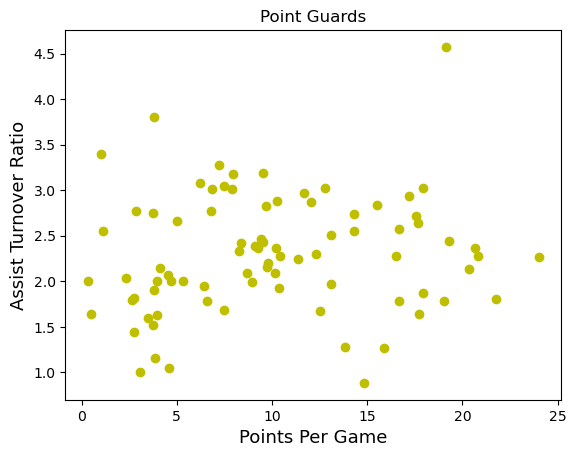

In [147]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()


#### 生成聚类数据


In [148]:
# 生成聚类数据

# reset_index(drop=True) 重置索引值，便于后续和聚类结果的concat
point_guards=point_guards.reset_index(drop=True) 
pg_frame = pd.DataFrame(point_guards,columns=['ppg','atr']) # 使用两个特征数据进行聚类

In [149]:
# 查看聚类数据简要信息
pg_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ppg     82 non-null     float64
 1   atr     82 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [150]:
# 聚类数据预览
pg_frame.head(10)

,ppg,atr
0,13.098592,2.504000
1,7.500000,1.684211
2,8.354430,2.424000
3,9.250000,2.365854
4,6.872727,3.009804
5,17.744186,1.643357
6,14.850000,0.885417
7,8.958333,1.991453
8,12.785714,3.022901
9,3.071429,1.000000


### 步骤5 Kmeans模型

#### 训练kmeans

使用kmeans算法对数据进行聚类分析，其中类别数k是超参数，需要提前指定。


In [151]:
# KMeans算法实例化，将其设置为K=10
est = KMeans(n_clusters=10)

# 作用到特征数据
est.fit(pg_frame)

#取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_,columns=['cluster'])

#生成有聚类后dataframe
pg_frame_label = pd.concat([pg_frame,kmeans_clustering_labels],axis=1,ignore_index=True)

#pg_frame_label.head()
pg_frame_label.shape

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(82, 3)

#### 聚类结果预览

In [152]:
pg_frame_label.head()

,0,1,2
0,13.098592,2.504000,6
1,7.500000,1.684211,8
2,8.354430,2.424000,8
3,9.250000,2.365854,7
4,6.872727,3.009804,8


#### 可视化聚类结果


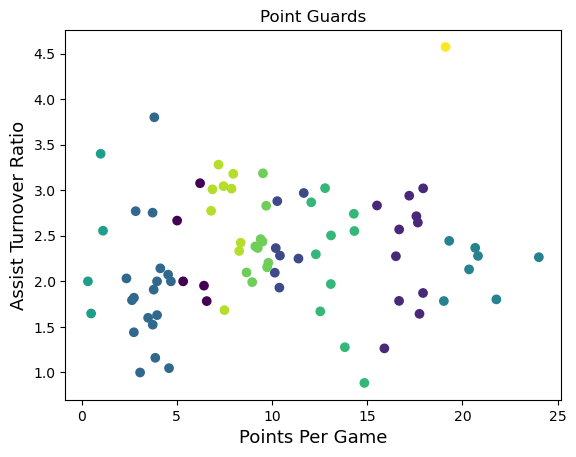

In [153]:
# 聚类特征数据可视化
plt.scatter(pg_frame_label[0], pg_frame_label[1], c=pg_frame_label[2])
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()


### 步骤六 筛选最优K值

由于聚类K值是超参数，它的选择对算法的最终结果也有很大的影响。该环节使用网格法选择最优的K值，使用calinski_harabaz_score评估给定K值下算法的性能。

在scikit-learn中， calinski_harabaz_score是Calinski-Harabasz Index。CH指标通过计算类中各点与类中心的距离平方和来度量类内的紧密度，通过计算各类中心点与数据集中心点距离平方和来度量数据集的分离度，CH指标由分离度与紧密度的比值得到。从而，CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果。 


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

calinski_harabasz_score with k=2 is 201.26220230528276
calinski_harabasz_score with k=3 is 277.02327547476034
calinski_harabasz_score with k=4 is 318.053934400976
calinski_harabasz_score with k=5 is 295.2967195168309
calinski_harabasz_score with k=6 is 336.3089655333164
calinski_harabasz_score with k=7 is 322.79322309830775
calinski_harabasz_score with k=8 is 385.19360357771103
calinski_harabasz_score with k=9 is 379.5389726814842
calinski_harabasz_score with k=10 is 389.0500815179346
calinski_harabasz_score with k=11 is 376.78573732549063
calinski_harabasz_score with k=12 is 356.11635312801377
calinski_harabasz_score with k=13 is 341.94828552044794


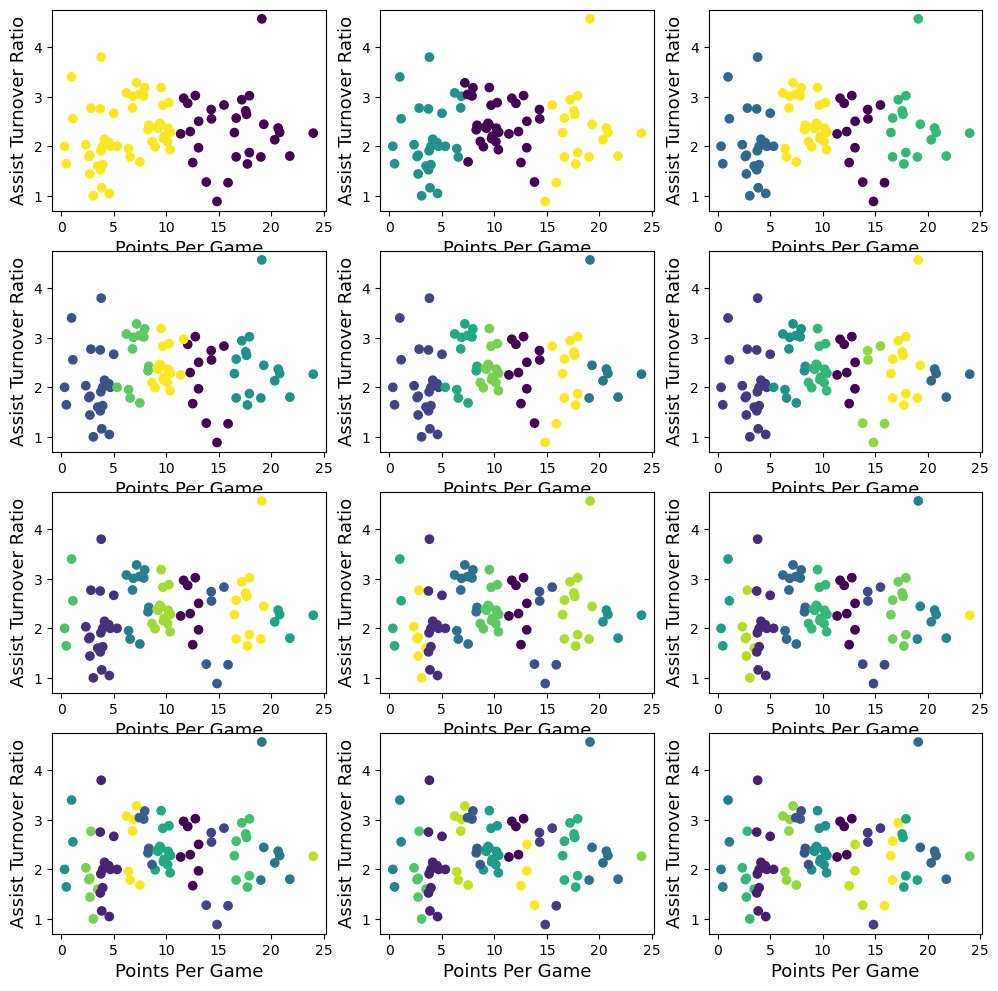

In [154]:
# KMeans算法实例化，将其设置为K=range（2,14）
d = {}
fig_reduced_data = plt.figure(figsize= (12,12))
for k in range(2,14):
    
    # KMeans算法实例化
    est = KMeans(n_clusters=k,random_state=111)
    
    #作用到降维后的数据上
    label = est.fit_predict(pg_frame)
    
    # 评估不同k值聚类算法效果
    score = metrics.calinski_harabasz_score(pg_frame,label)
    d.update({k:score})
    print('calinski_harabasz_score with k={0} is {1}'.format(k,score))
    
    # 不同聚类结果可视化
    ax= plt.subplot(4,3,k-1)
    ax.scatter(pg_frame['ppg'], pg_frame['atr'], c=label)
    ax.set_xlabel('Points Per Game', fontsize=13)
    ax.set_ylabel('Assist Turnover Ratio', fontsize=13)

Text(0, 0.5, 'calinski_harabaz_score')

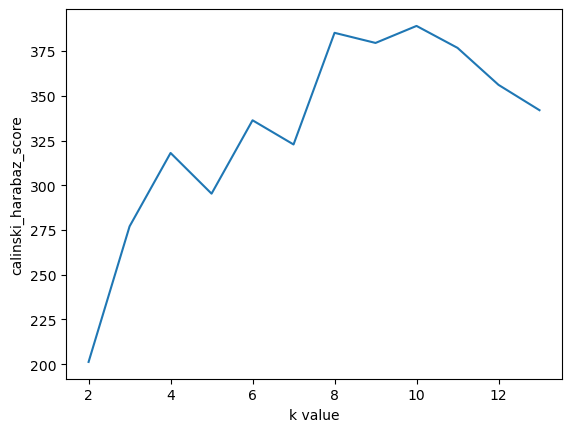

In [155]:
# 绘制不同k值对应的score，找到最优的k值
x = []
y = []
for k,score in d.items():
    x.append(k)
    y.append(score)   

plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')


### 步骤7 不同簇球员分析

查看不同簇下球员的特征差异，更好的对球员进行画像分析。

#### 数据拼接


In [159]:
result_data=pd.concat([point_guards,kmeans_clustering_labels],axis=1)
result_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
0,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,53,3,125,147,930,2013-2014,2013,13.098592,2.504000,6
1,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,7,4,19,30,150,2013-2014,2013,7.500000,1.684211,8
2,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,26,0,125,129,660,2013-2014,2013,8.354430,2.424000,8
3,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,60,9,82,161,666,2013-2014,2013,9.250000,2.365854,7
4,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,54,8,102,85,378,2013-2014,2013,6.872727,3.009804,8



#### 年龄 age 分析


In [160]:
age = result_data.groupby('cluster').describe().loc[:,'age']
age

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5.0,26.400000,4.037326,22.0,24.00,25.0,29.00,32.0
1,11.0,25.000000,2.569047,22.0,23.50,25.0,26.00,31.0
2,7.0,26.857143,1.214986,25.0,26.50,27.0,27.00,29.0
3,18.0,26.055556,4.928575,20.0,23.00,25.0,26.75,36.0
4,7.0,24.142857,2.193063,21.0,23.00,24.0,25.00,28.0
5,4.0,34.000000,3.741657,29.0,32.75,34.5,35.75,38.0
6,10.0,24.900000,3.348300,21.0,23.00,24.0,26.75,31.0
7,10.0,28.600000,2.988868,23.0,27.25,29.0,30.75,33.0
8,9.0,28.555556,5.637178,22.0,23.00,29.0,31.00,39.0


<Axes: xlabel='cluster'>

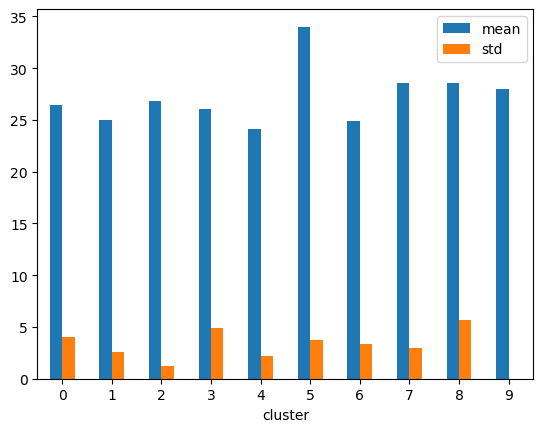

In [161]:
# 查看均值和标准差
age[['mean','std']].plot(kind ='bar',rot = 0,legend = True)


#### 投篮命中率 fg 分析


In [130]:
fg_ = result_data.groupby('cluster').describe().loc[:,'fg']
fg_

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,12.0,152.083333,68.716094,36.0,108.75,158.0,207.50,254.0
1,11.0,387.454545,125.354189,58.0,385.00,449.0,456.50,463.0
2,4.0,3.000000,2.160247,0.0,2.25,3.5,4.25,5.0
3,6.0,287.500000,74.244865,141.0,294.25,309.5,328.50,341.0
4,6.0,523.666667,65.331973,406.0,505.00,542.5,570.25,579.0
5,17.0,51.176471,29.602017,15.0,31.00,52.0,62.00,126.0
6,15.0,237.333333,45.225888,151.0,215.00,244.0,263.50,309.0
7,6.0,329.833333,73.960575,203.0,304.00,341.5,384.25,403.0
8,2.0,499.000000,216.374675,346.0,422.50,499.0,575.50,652.0


<Axes: xlabel='cluster'>

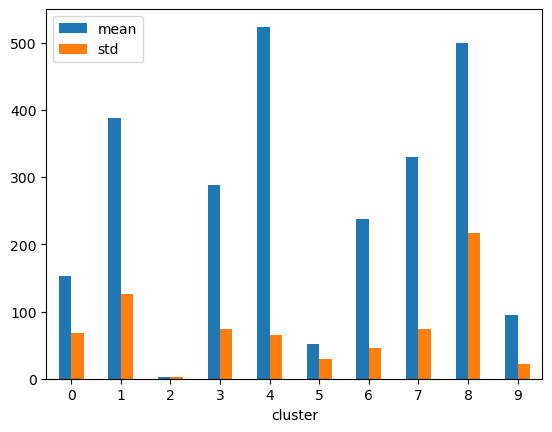

In [131]:
# 查看均值和标准差
fg_[['mean','std']].plot(kind ='bar',rot = 0,legend = True)


#### 罚球命中率 ft 分析


In [132]:
ft_ = result_data.groupby('cluster').describe().loc[:,'ft']
ft_

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,12.0,59.250000,38.856671,19.0,31.75,56.0,71.50,158.0
1,11.0,238.818182,84.614205,27.0,211.00,258.0,297.50,324.0
2,4.0,1.250000,1.892969,0.0,0.00,0.5,1.75,4.0
3,6.0,162.666667,103.233070,42.0,97.50,147.0,211.50,326.0
4,6.0,326.500000,31.175311,291.0,300.50,328.0,344.25,371.0
5,17.0,14.470588,7.583845,5.0,8.00,10.0,21.00,29.0
6,15.0,107.666667,43.996212,44.0,80.50,95.0,125.00,227.0
7,6.0,153.500000,72.284853,51.0,107.00,165.5,194.00,248.0
8,2.0,275.000000,46.669048,242.0,258.50,275.0,291.50,308.0


<Axes: xlabel='cluster'>

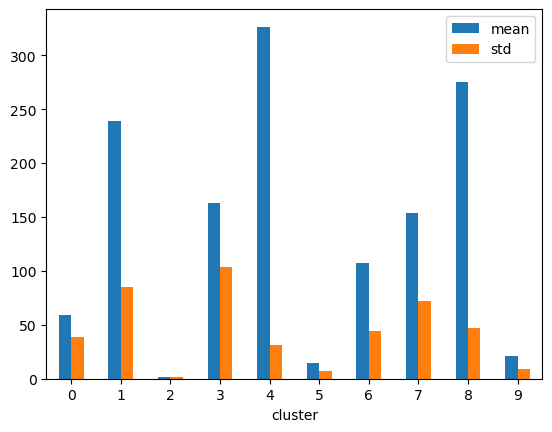

In [133]:
# 查看均值和标准差
ft_[['mean','std']].plot(kind ='bar',rot = 0,legend = True)


## 实验小结

本章实验以NBA控卫数据集为研究对象，使用Kmeans算法对控卫进行了聚类分析，再此过程中对数据查看、数据预处理、算法调优环节进行了详细的介绍和代码实现。